In [47]:
from logging import WARNING, INFO
#from typing import Callable, Dict, List, Optional, Tuple, Union
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import cm

In [48]:
run_name = '01234567_2'
#seed = '1999'
save_path = '../plots/NIID/dirichlet_1/'
#file_path = 'outputs/no_pretrain/' + 'seed_' + seed + '/' + run_name #NEED TO READ ALL FILES
root = '../outputs/NIID/dirichlet_1/'
file_path = root + run_name
num_agents = 10

In [49]:
tplgys = []
raw_tplgys = []
acc_distr = []
# Read file
file = open(file_path+'/0_pool.out', mode = 'r', encoding = 'utf-8-sig')
lines = file.readlines()
tplgys.append(lines)
file.close()
# Read file
file = open(file_path+'/raw.out', mode = 'r', encoding = 'utf-8-sig')
r_lines = file.readlines()
raw_tplgys.append(r_lines)
file.close()
# Read file
file = open(file_path+'/acc_distr.out', mode = 'r', encoding = 'utf-8-sig')
a_lines = file.readlines()
acc_distr.append(a_lines)
file.close()

In [50]:
tplgy_ID = []
loss = []
acc = []

for line in tplgys[0]:
    tplgy_ID.append(int(line.split(' ')[1]))
    loss.append(float(line.split(' ')[-3]))
    acc.append(float(line.split(' ')[-1]))
    
print(loss)
print(acc)

[195.81510269641876, 260.42677426338196, 271.12602829933167, 252.6737209558487, 224.92318439483643, 197.06624245643616, 223.2202970981598, 204.67541921138763, 181.879248380661, 181.85133957862854]
[0.646, 0.6499, 0.6451, 0.6492, 0.6489, 0.651, 0.6413, 0.6439, 0.0964, 0.1035]


In [51]:
exec_times = []
for tplgy in raw_tplgys:
    exec_times.append(float(tplgy[-1].split(' ')[1])/60)
print(exec_times)

[1121.6929329593977]


In [52]:
# fig, axs = plt.subplots(3, 2)
# axs[0, 0].plot(tplgy_ID[0], acc[0], '.')
# axs[0, 0].set_ylim(0, 0.8)
# axs[0, 0].set_title("Tplgy 0", fontsize=9)
# axs[0, 1].plot(tplgy_ID[1], acc[1], '.')
# axs[0, 1].set_ylim(0, 0.8)
# axs[0, 1].set_title("Tplgy 1", fontsize=9)
# axs[1, 0].plot(tplgy_ID[2], acc[2], '.')
# axs[1, 0].set_ylim(0, 0.8)
# axs[1, 0].set_title("Tplgy 2", fontsize=9)
# axs[1, 1].plot(tplgy_ID[3], acc[3], '.')
# axs[1, 1].set_ylim(0, 0.8)
# axs[1, 1].set_title("Tplgy 3", fontsize=9)
# axs[2, 0].plot(tplgy_ID[4], acc[4], '.')
# axs[2, 0].set_ylim(0, 0.8)
# axs[2, 0].set_title("Tplgy 4", fontsize=9)
# 
# for ax in axs.flat:
#     ax.set(xlabel='Node ID', ylabel='Acc')
# 
# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
# 
# plt.savefig(save_path+run_name+'_acc.pdf')

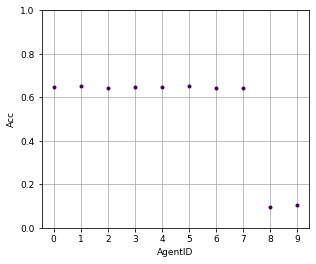

In [53]:
font = {'size': 9}
plt.rc('font', **font)
viridis = cm.get_cmap('viridis', 5)
plt.plot(tplgy_ID, acc, '.', color=viridis(0))
plt.ylim(0, 1.)
x = np.arange(0, num_agents, 1)
plt.xticks(x)
#plt.title("Tplgy 0", fontsize=9)
plt.xlabel('AgentID')
plt.ylabel('Acc')
plt.grid()

ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#lgd = ax.legend(['Tplgy 0', 'Tplgy 2', 'Tplgy 4', 'Tplgy 6', 'Tplgy 7'], loc='upper center',shadow=True, bbox_to_anchor=(0.5, -0.15), ncol = 5, fancybox= True)
plt.savefig(save_path+run_name+'_summarized_acc.pdf')#, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [54]:
# fig, axs = plt.subplots(3, 2)
# axs[0, 0].plot(tplgy_ID[0], loss[0], '.')
# axs[0, 0].set_ylim(50, 200)
# axs[0, 0].set_title("Tplgy 0", fontsize=9)
# axs[0, 1].plot(tplgy_ID[1], loss[1], '.')
# axs[0, 1].set_ylim(50, 200)
# axs[0, 1].set_title("Tplgy 1", fontsize=9)
# axs[1, 0].plot(tplgy_ID[2], loss[2], '.')
# axs[1, 0].set_ylim(50, 200)
# axs[1, 0].set_title("Tplgy 2", fontsize=9)
# axs[1, 1].plot(tplgy_ID[3], loss[3], '.')
# axs[1, 1].set_ylim(50, 200)
# axs[1, 1].set_title("Tplgy 3", fontsize=9)
# axs[2, 0].plot(tplgy_ID[4], loss[4], '.')
# axs[2, 0].set_ylim(50, 200)
# axs[2, 0].set_title("Tplgy 4", fontsize=9)
# 
# for ax in axs.flat:
#     ax.set(xlabel='Node ID', ylabel='Loss')
# 
# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
# 
# plt.savefig(save_path+run_name+'_loss.pdf')

In [55]:
print(loss)

[195.81510269641876, 260.42677426338196, 271.12602829933167, 252.6737209558487, 224.92318439483643, 197.06624245643616, 223.2202970981598, 204.67541921138763, 181.879248380661, 181.85133957862854]


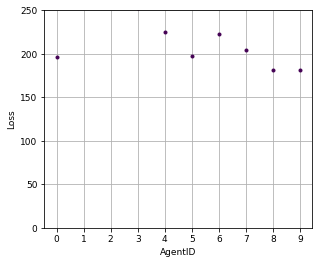

In [56]:
font = {'size': 9}
plt.rc('font', **font)
viridis = cm.get_cmap('viridis', 5)
plt.plot(tplgy_ID, loss, '.', color=viridis(0))
x = np.arange(0, num_agents, 1)
plt.xticks(x)
plt.ylim(0, 250)
#plt.title("Tplgy 0", fontsize=9)
plt.xlabel('AgentID')
plt.ylabel('Loss')
plt.grid()

ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

#lgd = ax.legend(['Tplgy 0', 'Tplgy 2', 'Tplgy 4', 'Tplgy 6', 'Tplgy 7'], loc='upper center', shadow = True, bbox_to_anchor=(0.5, -0.15), ncol = 5, fancybox= True)

plt.savefig(save_path+run_name+'_summarized_loss.pdf')#, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [57]:
#VISUALIZE LOSSES PER TOPOLOGY AND AGENT
loss_per_tplgy = []
num_rounds = 1020
    
tmp = raw_tplgys[0][1].split()
for i in range(1,num_rounds+1):
    loss_per_tplgy.append((float(tmp[2*i][:-1])))

In [58]:
print(loss_per_tplgy)

[181.96495819091797, 181.79276752471924, 181.93353986740112, 175.01702451705933, 178.2575740814209, 181.40607571601868, 181.80931663513184, 164.78879308700562, 177.7724163532257, 181.87803530693054, 181.84645986557007, 180.75167441368103, 175.6530475616455, 161.96875488758087, 166.47858381271362, 165.97445940971375, 179.0051896572113, 144.83450067043304, 148.94091129302979, 181.87877321243286, 181.85197925567627, 173.89203882217407, 162.82919466495514, 146.89779663085938, 147.7669256925583, 145.426003575325, 171.49751901626587, 132.4004589319229, 133.77276802062988, 181.88185691833496, 181.85918474197388, 157.0444210767746, 148.394677400589, 127.34497499465942, 134.68637096881866, 133.5435584783554, 166.49806785583496, 128.06794464588165, 126.38191509246826, 181.89241981506348, 181.85844111442566, 148.61413073539734, 130.84737420082092, 111.168696641922, 126.71838617324829, 126.39287674427032, 165.8663421869278, 121.86518657207489, 121.53971099853516, 181.88501143455505, 181.8531644344

In [59]:
#VISUALIZE LOSSES PER TOPOLOGY AND AGENT
loss_per_tplgy_by_agent = []
num_rounds = 1020
for i in range(num_agents):
    tmp_loss = []
    for j in range(i, num_rounds, num_agents):
        tmp_loss.append((loss_per_tplgy[j]))
    loss_per_tplgy_by_agent.append(tmp_loss)

In [60]:
print(len(loss_per_tplgy_by_agent[0]))

102


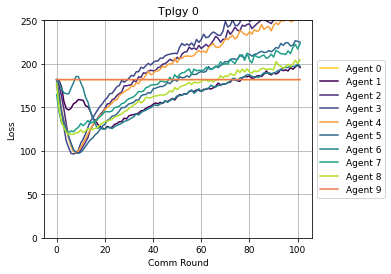

In [61]:
#VISUALIZE LOSSES PER TOPOLOGY AND AGENT
viridis = cm.get_cmap('viridis', 10)
plasma = cm.get_cmap('plasma', 10)
font = {'size': 9}
titles = ['Tplgy 0', 'Tplgy 2', 'Tplgy 4', 'Tplgy 6', 'Tplgy 7']

for i in range(1):
    plt.rc('font', **font)
    plt.plot(loss_per_tplgy_by_agent[0], color=plasma(0.8))
    plt.plot(loss_per_tplgy_by_agent[1], color=viridis(0.))
    plt.plot(loss_per_tplgy_by_agent[2], color=viridis(0.1))
    plt.plot(loss_per_tplgy_by_agent[3], color=viridis(0.2))
    plt.plot(loss_per_tplgy_by_agent[4], color=plasma(0.7))
    plt.plot(loss_per_tplgy_by_agent[5], color=viridis(0.3))
    plt.plot(loss_per_tplgy_by_agent[6], color=viridis(0.4))
    plt.plot(loss_per_tplgy_by_agent[7], color=viridis(0.5))
    plt.plot(loss_per_tplgy_by_agent[8], color=viridis(0.85))
    plt.plot(loss_per_tplgy_by_agent[9], color=plasma(0.6))
    plt.ylim(0, 250)
    plt.xlabel('Comm Round')
    plt.ylabel('Loss')
    plt.title(titles[i], fontsize=11)
    ax = plt.gca()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(['Agent 0', 'Agent 1', 'Agent 2', 'Agent 3', 'Agent 4', 'Agent 5', 'Agent 6', 'Agent 7', 'Agent 8', 'Agent 9'], loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid()
    
    plt.savefig(save_path + run_name+'_raw_summarized_loss.pdf')
    plt.show()


In [62]:
# font = {'size': 5}
# plt.rc('font', **font)
# 
# #VISUALIZE LOSSES PER TOPOLOGY AND AGENT
# viridis = cm.get_cmap('viridis', 10)
# plasma = cm.get_cmap('plasma', 10)
# 
# fig, axs = plt.subplots()
# fig.tight_layout()
# 
# axs.plot(loss_per_tplgy_by_agent[0][:24], color=plasma(0.8))
# axs.plot(loss_per_tplgy_by_agent[1][:24], color=viridis(0.))
# axs.plot(loss_per_tplgy_by_agent[2][:24], color=viridis(0.1))
# axs.plot(loss_per_tplgy_by_agent[3][:24], color=viridis(0.2))
# axs.plot(loss_per_tplgy_by_agent[4][:24], color=plasma(0.7))
# axs.plot(loss_per_tplgy_by_agent[5][:24], color=viridis(0.3))
# axs.plot(loss_per_tplgy_by_agent[6][:24], color=viridis(0.4))
# axs.plot(loss_per_tplgy_by_agent[7][:24], color=viridis(0.5))
# axs.plot(loss_per_tplgy_by_agent[8][:24], color=viridis(0.85))
# axs.plot(loss_per_tplgy_by_agent[9][:24], color=plasma(0.4))
# axs.grid()
# axs.set_ylim(0, 250)
# #axs[0, 0].set_xlabel('Comm Round')
# #axs[0, 0].set_ylabel('Loss')
# axs.set_title("Tplgy 0", fontsize=6)
# 
# ax = plt.gca()
# box = ax.get_position()
# #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# lgd = ax.legend(['Agent 0 - ND', 'Agent 1 - R', 'Agent 2 - R', 'Agent 3 - R', 'Agent 4 - ND', 'Agent 5 - R', 'Agent 6 - R', 'Agent 7 - R', 'Agent 8 - D', 'Agent 9 - DND'], loc='upper center', shadow = True, bbox_to_anchor=(-0.15, -0.15), ncol = 5, fancybox= True)
# 
# plt.savefig(save_path+run_name+'_top_loss.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
# plt.show()

In [63]:
# '''Visualize acc average per pool and comm round'''
# 
# acc1 = []
# for accuracies in acc_distr:
#     acc2 = []
#     for acc in accuracies:
#         res = []
#         for idx in acc.split(' '):
#             f_idx = float(idx)
#             if f_idx == 1.0:
#                 f_idx = 0.0
#             res.append(f_idx)
#         #res = [float(idx) for idx in acc.split(' ')]
#         if res == 1.0:
#             res = 0.0
#         acc2.append(np.average(res))
#     acc1.append(acc2)

In [64]:
# '''Create sets with exec times'''
# acc_per_nodes = []
# for i in range(num_agents):
#     tmp_tplgy = []
#     for j in range(5):
#         tmp_tplgy.append(acc1[j][i::10])
#     acc_per_nodes.append(tmp_tplgy)

In [65]:
# viridis = cm.get_cmap('viridis', 10)
# font = {'size': 9}
# for node in range(num_agents):
#     plt.rc('font', **font)
#     for i in range(5):
#         plt.plot(acc_per_nodes[node][i], color=viridis(0.1 * 2.*i))
#     #x = np.arange(0, num_rounds, 1)
#     #plt.xticks(x)
#     plt.ylim(0.0, 1.0)
#     plt.title('Node ' + str(node))
#     plt.xlabel('Comm Round')
#     plt.ylabel('Acc')
#     plt.grid()
# 
#     ax = plt.gca()
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#     ax.legend(['Tplgy 0', 'Tplgy 1', 'Tplgy 2', 'Tplgy 3', 'Tplgy 4'], loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.savefig(save_path+'node'+ str(node) +'_distr_val_acc.pdf')
#     plt.show()

In [66]:
# '''Visualize Exec times per topology'''
# font = {'size': 9}
# plt.rc('font', **font)
# x = [0, 2, 4, 6, 7]
# plt.plot(x, exec_times, '.')
# plt.xticks(x)
# plt.title("Exec times " + run_name)
# plt.xlabel("tplgy")
# plt.ylabel("mins")
# plt.grid()
# plt.savefig(save_path+run_name+'_exec_times.pdf')
# plt.show()